In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:75% !important; }</style>"))

import csv
from datetime import datetime
from datetime import timedelta
#from struct import pack
import os
import gc
from numpy import abs, max 
import scipy
#from scipy import io
import numpy as np
from matplotlib import pyplot as plt
#from scipy.signal import butter, lfilter
from scipy import signal
#from scipy.signal import blackman
#from scipy.signal import periodogram
#import gc
#import os
import sys
import pandas as pd
#from sklearn.decomposition import PCA
from tqdm import tqdm
from scipy.spatial import distance

gc.enable()

video_start = '20190501'#'20190327'#'20181220' #YYYYMMDD
video_end = '20190501'#'20190327'#'20181220' #YYYYMMDD
data_path = '/data/'
sensor_list = ["acc_w","wifi"]#["gyro","acc2","acc_w","wifi","magnetic"]

temp_video_start = video_start[0:4] + "/" + video_start[4:6] + "/" +video_start[6:8]
temp_video_end = video_end[0:4] + "/" + video_end[4:6] + "/" +video_end[6:8]
print temp_video_start
print temp_video_end

video_startdatte = datetime.strptime(temp_video_start,'%Y/%m/%d')
video_enddate = datetime.strptime(temp_video_end,'%Y/%m/%d')

2019/05/01
2019/05/01


In [2]:
root = "env/"

envs = os.listdir(root)
envs = envs[0:len(envs)-1]
envs = [int(x) for x in envs]
envs.sort()

In [3]:
print "Please select a testing environment from the following environments list:"

for i in envs:
    print "Environment: (",i,")"
    
test_env = raw_input("Testing environment ")

test_env = int(test_env)

Please select a testing environment from the following environments list:
Environment: ( 5 )
Environment: ( 6 )
Environment: ( 8 )
Environment: ( 9 )
Environment: ( 10 )
Testing environment 5


In [4]:
envs.remove(test_env)
train_env=envs

In [5]:
train_env

[6, 8, 9, 10]

In [6]:
train_root = root + str(test_env) + "/dat/" + "train_dat/"

In [7]:
all_mots = pd.DataFrame()
acc = pd.DataFrame()
#labels = pd.DataFrame()
for e in train_env:
    print len(all_mots)
    df_a = pd.read_csv("env/" + str(e) + "/dat/train_dat/" + "all_mots", header=None)
    df_acc = pd.read_csv("env/" + str(e) + "/dat/" + "acc", header=None)
    #df_l = pd.read_csv("env/" + str(e) + "/dat/" + "labels", header=None)
    #all_mots = all_mots.append(df_a, ignore_index = True)
    all_mots = pd.concat([all_mots,df_a],axis = 0,sort=False,ignore_index = True)
    acc = pd.concat([acc,df_acc],axis = 0,sort=False,ignore_index = True)
    #labels = pd.concat([labels,df_l],axis = 0,sort=False,ignore_index = True)
    print len(all_mots)

    #df_l = pd.read_csv("env/" + str(e) + "/dat/" + "labels")
    #df_a.drop(["Unnamed: 0"], axis=1, inplace=True)
    #df_l.drop(["Unnamed: 0"], axis=1, inplace=True)
    
    #if e==train_env[0]:
    #    acc = df_a
    #    labels = df_l
        
    #else:
    #    acc = acc.append(df_a, ignore_index = True)
    #    labels = labels.append(df_l, ignore_index = True)
        #pd.concat([acc,df_a],ignore_index=True)
        #pd.concat([labels,df_l], ignore_index=True)

0
794
794
1316
1316
2047
2047
2295


In [8]:
acc

,0,1
0,NaN,0.000000
1,0.0,4.153605
2,1.0,3.889403
3,2.0,3.697325
4,3.0,3.399065
5,4.0,3.426182
6,5.0,3.317291
7,6.0,3.060173
8,7.0,3.304810
9,8.0,3.127418


In [9]:
acc.drop([0], axis=1, inplace=True)

In [10]:
all_mots

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1,3.017716,2.606474,2.475071,2.964946,2.971992,3.217819,3.732120,3.276589,3.398201,...,4.264710,4.423144,4.098008,4.025891,2.530137,1.309105,0.532681,2.200174,2.388257,-0.048183
1,1,2.606474,2.475071,2.964946,2.971992,3.217819,3.732120,3.276589,3.398201,2.466905,...,4.423144,4.098008,4.025891,2.530137,1.309105,0.532681,2.200174,2.388257,-0.048183,-2.122128
2,1,4.257018,3.974360,4.144614,4.151684,4.024171,4.306880,4.234106,4.138472,4.507705,...,7.259749,6.870845,7.175546,7.051890,7.296702,7.302747,7.411544,6.972054,6.823170,7.161127
3,1,3.974360,4.144614,4.151684,4.024171,4.306880,4.234106,4.138472,4.507705,4.188239,...,6.870845,7.175546,7.051890,7.296702,7.302747,7.411544,6.972054,6.823170,7.161127,7.709003
4,1,4.144614,4.151684,4.024171,4.306880,4.234106,4.138472,4.507705,4.188239,3.778791,...,7.175546,7.051890,7.296702,7.302747,7.411544,6.972054,6.823170,7.161127,7.709003,7.216787
5,1,2.230327,2.046363,1.766554,1.727282,2.308549,2.427679,2.229441,1.944036,2.147479,...,3.510930,3.012356,2.917261,3.753908,4.809112,4.630790,5.053917,5.205158,5.712162,5.002936
6,1,2.046363,1.766554,1.727282,2.308549,2.427679,2.229441,1.944036,2.147479,2.104197,...,3.012356,2.917261,3.753908,4.809112,4.630790,5.053917,5.205158,5.712162,5.002936,4.354930
7,1,1.766554,1.727282,2.308549,2.427679,2.229441,1.944036,2.147479,2.104197,2.164066,...,2.917261,3.753908,4.809112,4.630790,5.053917,5.205158,5.712162,5.002936,4.354930,3.972779
8,1,1.727282,2.308549,2.427679,2.229441,1.944036,2.147479,2.104197,2.164066,2.187019,...,3.753908,4.809112,4.630790,5.053917,5.205158,5.712162,5.002936,4.354930,3.972779,4.300953
9,1,2.308549,2.427679,2.229441,1.944036,2.147479,2.104197,2.164066,2.187019,2.251976,...,4.809112,4.630790,5.053917,5.205158,5.712162,5.002936,4.354930,3.972779,4.300953,4.454130


In [11]:
location_list = all_mots.take([0], axis=1)

In [12]:
all_mots = all_mots.drop(all_mots.columns[0], axis = 1)

In [13]:
location_list

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


## Euclidean distance

from sklearn.metrics.pairwise import euclidean_distances

dist_mat = euclidean_distances(all_mots,all_mots)

plt.figure(figsize=(10,10))
plt.imshow(dist_mat, cmap='jet',interpolation='nearest', origin='upper', extent=[0,len(dist_mat),0,len(dist_mat)], aspect='auto')
#plt.colorbar()

# Cosine similarity -> distance matrix

## 1

from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A_sparse = sparse.csr_matrix(all_mots.values)

similarities = cosine_similarity(A_sparse)

std_similarities = (similarities - np.mean(similarities)) / np.std(similarities)

1-pd.DataFrame(similarities).max().max()

## 2

In [14]:
similarity = np.dot(all_mots.values, all_mots.values.T)


# squared magnitude of preference vectors (number of occurrences)
square_mag = np.diag(similarity)

# inverse squared magnitude
inv_square_mag = 1 / square_mag

# if it doesn't occur, set it's inverse magnitude to zero (instead of inf)
inv_square_mag[np.isinf(inv_square_mag)] = 0

# inverse of the magnitude
inv_mag = np.sqrt(inv_square_mag)

# cosine similarity (elementwise multiply by inverse magnitudes)
cosine = similarity * inv_mag
cosine = cosine.T * inv_mag

In [15]:
pd.DataFrame(cosine)

,0,1,2,3,4,5,6,7,8,9,...,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294
0,1.000000,0.974738,0.165297,0.166495,0.157456,0.174591,0.190826,2.132372e-01,0.243094,0.259765,...,-0.209980,-2.029296e-01,-0.198715,-0.205228,-0.225051,-0.240652,-0.251345,-0.260408,-0.255600,-0.236302
1,0.974738,1.000000,0.141334,0.151101,0.153394,0.153853,0.160286,1.778987e-01,0.199967,0.229378,...,-0.235943,-2.135540e-01,-0.195419,-0.188526,-0.201408,-0.227314,-0.258031,-0.279074,-0.273484,-0.250430
2,0.165297,0.141334,1.000000,0.884111,0.698629,0.383152,0.424208,5.073017e-01,0.575898,0.602859,...,-0.003400,2.605959e-02,0.067109,0.063518,0.012729,-0.038752,-0.055278,-0.031286,0.019656,0.071923
3,0.166495,0.151101,0.884111,1.000000,0.885693,0.406918,0.392910,4.324435e-01,0.515581,0.583374,...,-0.021941,-4.565659e-03,0.042548,0.090445,0.067139,0.001558,-0.065066,-0.083647,-0.035669,0.044270
4,0.157456,0.153394,0.698629,0.885693,1.000000,0.441405,0.415614,4.009975e-01,0.441229,0.523398,...,0.000498,-2.291002e-02,0.010590,0.063858,0.093709,0.056448,-0.022391,-0.091857,-0.087754,-0.013075
5,0.174591,0.153853,0.383152,0.406918,0.441405,1.000000,0.835229,6.340339e-01,0.505460,0.446537,...,0.035888,4.184921e-02,0.026859,0.004093,-0.032115,-0.103270,-0.195559,-0.268174,-0.267807,-0.201891
6,0.190826,0.160286,0.424208,0.392910,0.415614,0.835229,1.000000,8.376491e-01,0.640471,0.514484,...,0.000928,3.460627e-02,0.057821,0.048513,0.007805,-0.042885,-0.129687,-0.226828,-0.271554,-0.244581
7,0.213237,0.177899,0.507302,0.432444,0.400998,0.634034,0.837649,1.000000e+00,0.840198,0.646331,...,-0.041342,-1.878981e-07,0.049182,0.078251,0.051674,-0.002250,-0.066370,-0.157000,-0.230313,-0.250961
8,0.243094,0.199967,0.575898,0.515581,0.441229,0.505460,0.640471,8.401978e-01,1.000000,0.843137,...,-0.057212,-4.143459e-02,0.012983,0.067138,0.080453,0.041374,-0.023628,-0.089174,-0.158492,-0.210037
9,0.259765,0.229378,0.602859,0.583374,0.523398,0.446537,0.514484,6.463312e-01,0.843137,1.000000,...,-0.040816,-5.702081e-02,-0.028786,0.029902,0.069245,0.069802,0.020640,-0.044831,-0.090353,-0.137957


pd.DataFrame(cosine).max().max()

## 3

len(all_mots)

from math import*

sim = []

def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
 
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

for x in tqdm(range(len(all_mots))):
    for y in range(len(all_mots)):
        sim.append(cosine_similarity(all_mots.values[x], all_mots.values[y]))

# DTW distance matrix

## 1

from dtw import dtw

for n in tqdm(range(len(all_mots))):
    x = all_mots.values[n]
    for m in range(len(all_mots)):
        y = all_mots.values[m]
        euclidean_norm = lambda x, y: np.abs(x - y)
        d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)

## 2

from cdtw import pydtw 


dist = []

for n in tqdm(range(len(all_mots))):
    di = []
    x = all_mots.values[n]
    for m in range(len(all_mots)):
        y = all_mots.values[m]
        #euclidean_norm = lambda x, y: np.abs(x - y)
        di.append(pydtw.dtw(x,y).get_dist())
        #d, cost_matrix, acc_cost_matrix, path = pydtw.dtw(x, y, dist=euclidean_norm).getdist()
    dist.append(di)

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(cosine, cmap='jet',interpolation='nearest', origin='upper', extent=[0,len(dist),0,len(dist)], aspect='auto')
#plt.colorbar()

NameError: name 'dist' is not defined

<Figure size 720x720 with 0 Axes>

In [17]:
dist_mat = dist

NameError: name 'dist' is not defined

In [18]:
np.isnan(np.min(dist_mat))

NameError: name 'dist_mat' is not defined

# Hierarchical clustering

In [19]:
max_dist = np.array(cosine).max()
distance_matrix = []
for feature in cosine:
    sim = []
    for element in feature:
        simv=1.0-element/max_dist
        #sim.append(simv if simv>0.1 else 0.0)
        sim.append(simv)
    distance_matrix.append(sim)

In [20]:
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

dist_array = ssd.squareform(np.around(distance_matrix, decimals = 10))#ssd.squareform(np.around(dist_mat, decimals = 5))

Z = linkage(dist_array, method='single', metric='euclidean')#,optimal_ordering=True)

plt.figure(figsize=(30,10))
dn = dendrogram(Z)
plt.show()

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(distance_matrix, cmap='jet',interpolation='nearest', origin='upper', extent=[0,len(dist),0,len(dist)], aspect='auto')
#plt.colorbar()

NameError: name 'dist' is not defined

<Figure size 720x720 with 0 Axes>

In [22]:
Z[:20]

array([[1.3460000e+03, 1.3470000e+03, 1.0362385e-03, 2.0000000e+00],
       [1.3450000e+03, 2.2950000e+03, 1.0708922e-03, 3.0000000e+00],
       [1.3440000e+03, 2.2960000e+03, 1.0962837e-03, 4.0000000e+00],
       [1.3480000e+03, 2.2970000e+03, 1.1178392e-03, 5.0000000e+00],
       [1.3490000e+03, 2.2980000e+03, 1.1210921e-03, 6.0000000e+00],
       [1.3500000e+03, 2.2990000e+03, 1.3992354e-03, 7.0000000e+00],
       [1.3510000e+03, 2.3000000e+03, 1.4008151e-03, 8.0000000e+00],
       [1.3520000e+03, 2.3010000e+03, 1.4030996e-03, 9.0000000e+00],
       [1.3560000e+03, 1.3570000e+03, 1.4113975e-03, 2.0000000e+00],
       [1.3550000e+03, 2.3030000e+03, 1.4168067e-03, 3.0000000e+00],
       [1.3530000e+03, 2.3020000e+03, 1.4294237e-03, 1.0000000e+01],
       [1.3540000e+03, 2.3040000e+03, 1.4294833e-03, 4.0000000e+00],
       [2.3050000e+03, 2.3060000e+03, 1.4328516e-03, 1.4000000e+01],
       [7.3600000e+02, 7.4600000e+02, 4.5916163e-03, 2.0000000e+00],
       [2.0450000e+03, 2.0460000e+

In [23]:
t = 0.5*max(Z[:,2])
clusters = fcluster(Z, t, criterion="distance")

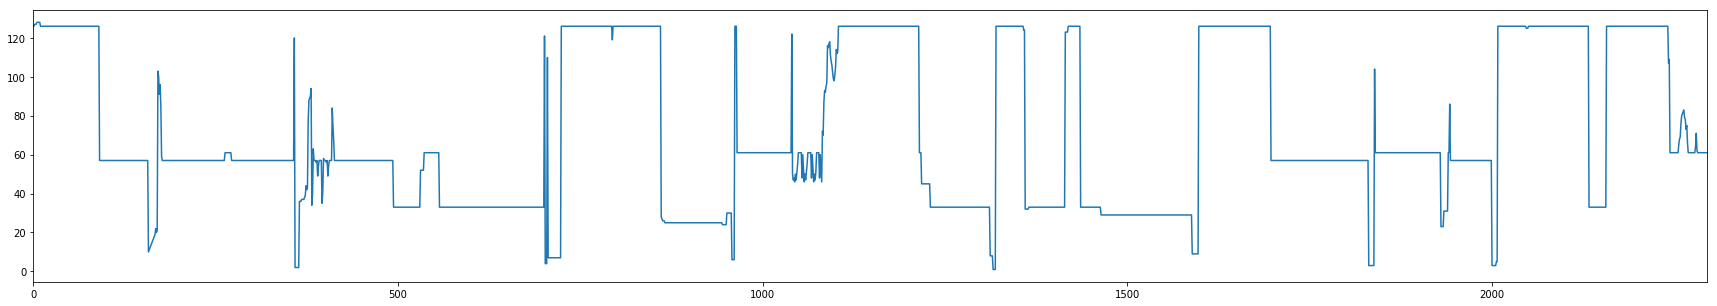

In [24]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(clusters))
plt.plot(clusters)

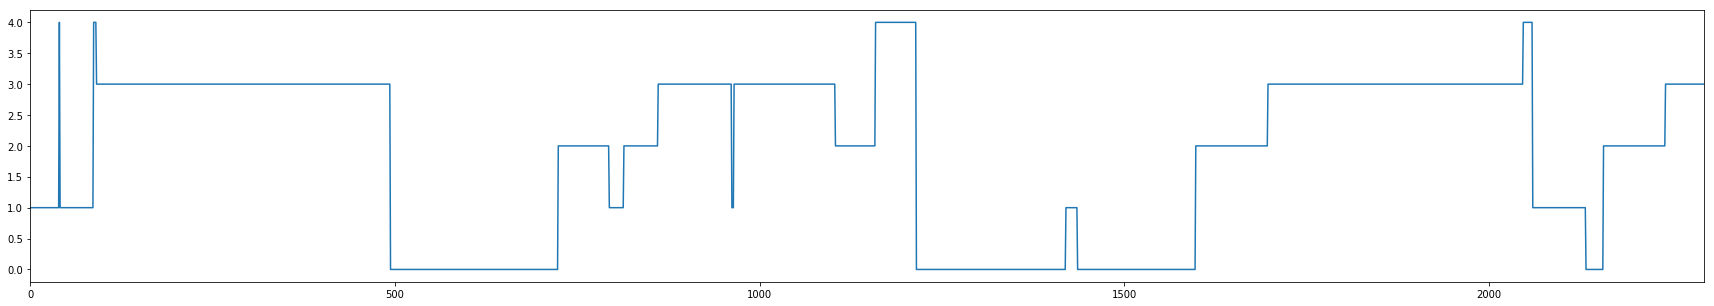

In [25]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(location_list))
plt.plot(location_list.values)

(0, 2295)

<Figure size 2160x360 with 0 Axes>

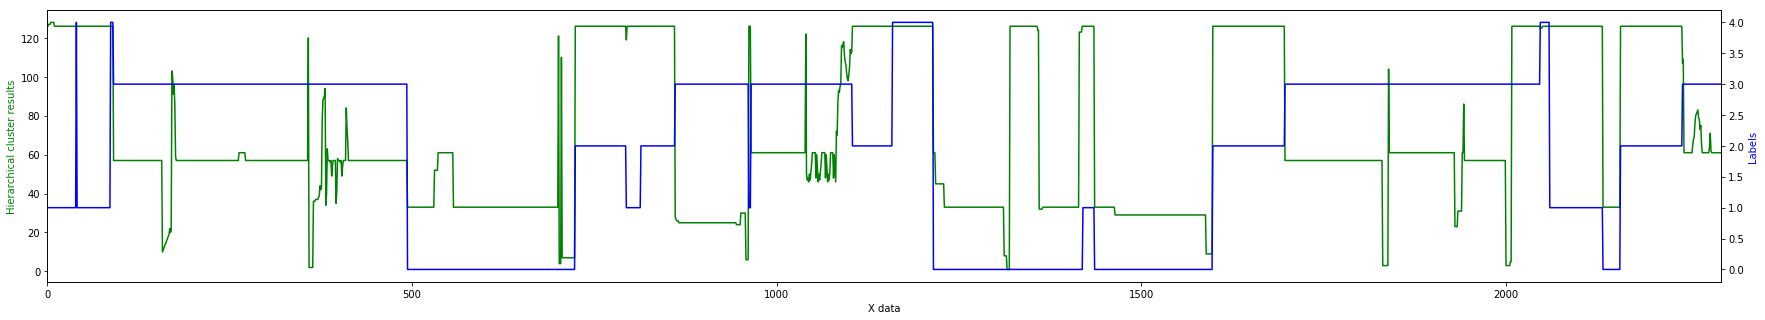

In [26]:
x = np.arange(0, len(clusters))

plt.figure(figsize=(30,5))
fig, ax1 = plt.subplots(figsize=(30,5))

ax2 = ax1.twinx()
ax1.plot(x, clusters, 'g-')
ax2.plot(x, location_list, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Hierarchical cluster results', color='g')
ax2.set_ylabel('Labels', color='b')
plt.xlim(0,len(location_list))

In [27]:
clusters[200]

57

In [28]:
all_mots[100]

0       -0.048183
1       -2.122128
2        7.161127
3        7.709003
4        7.216787
5        5.002936
6        4.354930
7        3.972779
8        4.300953
9        4.454130
10       1.267327
11      -2.299843
12      -2.777285
13      -1.897219
14      -0.775321
15      -0.953629
16      -0.476729
17      10.227919
18      10.659983
19      10.628064
20      10.055894
21      10.352811
22       9.161865
23       7.896968
24       3.636817
25       2.234857
26      -0.032119
27      -2.647045
28      10.275406
29      10.238073
          ...    
2265    -1.497022
2266     2.231114
2267     4.078828
2268     5.474975
2269     4.851674
2270     1.395295
2271     0.176186
2272     0.998451
2273     1.582930
2274     1.635688
2275     1.528739
2276     0.729190
2277     0.435701
2278     0.420767
2279     0.729207
2280     0.996925
2281    -0.058625
2282    -1.914393
2283    -2.034214
2284    -1.617388
2285    -0.109413
2286     0.682283
2287     1.303531
2288     1.098679
2289    -0

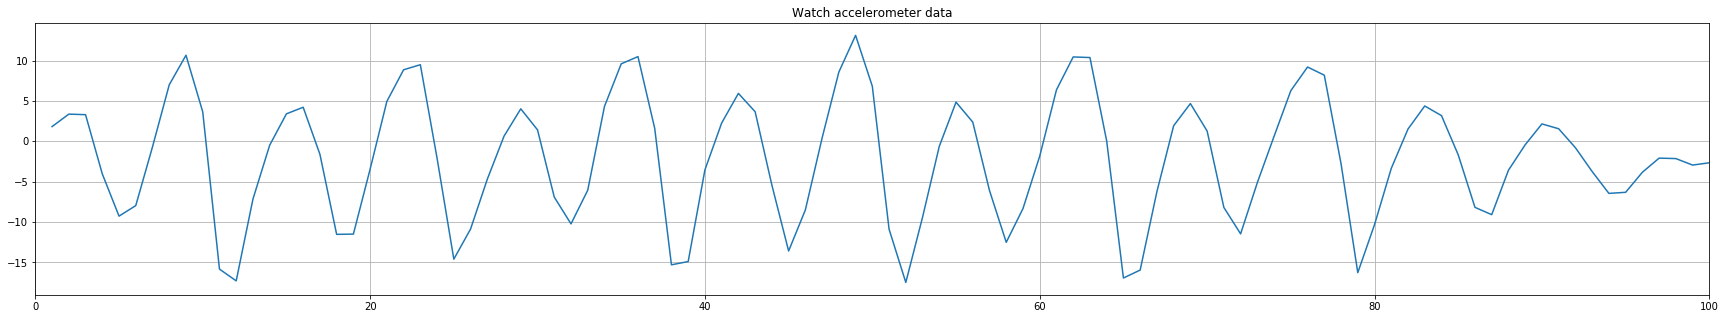

In [29]:
all_mots.loc[:,1:100].T[200].plot(figsize = (30,5),title="Watch accelerometer data",grid=1,xlim=[0,100])

In [30]:
motif_representatives.loc[:,1:100].T[32].plot(figsize = (30,5),title="Watch accelerometer data",grid=1,xlim=[0,100])

NameError: name 'motif_representatives' is not defined

# Motif frequency calculation

In [31]:
location_list.values.reshape(-1)

array([1, 1, 1, ..., 3, 3, 3])

In [32]:
type(clusters)

numpy.ndarray

In [33]:
place_times_cluster = np.vstack((location_list.values.reshape(-1), clusters)).T

In [34]:
pd.DataFrame(place_times_cluster)

,0,1
0,1,126
1,1,126
2,1,127
3,1,127
4,1,127
5,1,128
6,1,128
7,1,128
8,1,128
9,1,128


In [35]:
env_mot_list = []

for env in set(location_list.values.reshape(-1)):
    #print env
    pmcombo = place_times_cluster[place_times_cluster[:,0]==env]
    mot_list = []
    for motif in set(clusters):#set(pmcombo[:,1]):
        envmot = pmcombo[:,1]
        #print int(motif), envmot.tolist().count(motif)
        mot_list.append([int(motif), envmot.tolist().count(motif)])
        
    env_mot_list.append([int(env),mot_list])    
    #for motif in set(times_cluster):
     #   print no, times_cluster.count(no)

In [36]:
env_mot_list

[[0,
  [[1, 4],
   [2, 0],
   [3, 0],
   [4, 3],
   [5, 0],
   [6, 0],
   [7, 18],
   [8, 4],
   [9, 9],
   [10, 0],
   [11, 0],
   [12, 0],
   [13, 0],
   [14, 0],
   [15, 0],
   [16, 0],
   [17, 0],
   [18, 0],
   [19, 0],
   [20, 0],
   [21, 0],
   [22, 0],
   [23, 0],
   [24, 0],
   [25, 0],
   [26, 0],
   [27, 0],
   [28, 0],
   [29, 125],
   [30, 0],
   [31, 0],
   [32, 5],
   [33, 365],
   [34, 0],
   [35, 0],
   [36, 0],
   [37, 0],
   [38, 0],
   [39, 0],
   [40, 0],
   [41, 0],
   [42, 0],
   [43, 0],
   [44, 0],
   [45, 12],
   [46, 0],
   [47, 0],
   [48, 0],
   [49, 0],
   [50, 0],
   [51, 0],
   [52, 5],
   [53, 0],
   [54, 0],
   [55, 0],
   [56, 0],
   [57, 0],
   [58, 0],
   [59, 0],
   [60, 0],
   [61, 24],
   [62, 0],
   [63, 0],
   [64, 0],
   [65, 0],
   [66, 0],
   [67, 0],
   [68, 0],
   [69, 0],
   [70, 0],
   [71, 0],
   [72, 0],
   [73, 0],
   [74, 0],
   [75, 0],
   [76, 0],
   [77, 0],
   [78, 0],
   [79, 0],
   [80, 0],
   [81, 0],
   [82, 0],
   [83, 0],
 

In [37]:
motif_occur = []
for mot_type in set(clusters):
    motif_occur.append([mot_type,clusters.tolist().count(mot_type)])

In [38]:
motif_occur

[[1, 4],
 [2, 6],
 [3, 14],
 [4, 3],
 [5, 2],
 [6, 4],
 [7, 18],
 [8, 4],
 [9, 9],
 [10, 1],
 [11, 1],
 [12, 1],
 [13, 1],
 [14, 1],
 [15, 1],
 [16, 1],
 [17, 1],
 [18, 1],
 [19, 1],
 [20, 1],
 [21, 1],
 [22, 1],
 [23, 4],
 [24, 6],
 [25, 79],
 [26, 3],
 [27, 1],
 [28, 1],
 [29, 125],
 [30, 7],
 [31, 6],
 [32, 5],
 [33, 365],
 [34, 1],
 [35, 1],
 [36, 3],
 [37, 4],
 [38, 1],
 [39, 1],
 [40, 1],
 [41, 1],
 [42, 1],
 [43, 1],
 [44, 1],
 [45, 12],
 [46, 4],
 [47, 4],
 [48, 4],
 [49, 2],
 [50, 4],
 [51, 3],
 [52, 5],
 [53, 3],
 [54, 2],
 [55, 2],
 [56, 2],
 [57, 527],
 [58, 1],
 [59, 1],
 [60, 3],
 [61, 249],
 [62, 1],
 [63, 1],
 [64, 1],
 [65, 1],
 [66, 1],
 [67, 1],
 [68, 1],
 [69, 1],
 [70, 1],
 [71, 1],
 [72, 1],
 [73, 1],
 [74, 1],
 [75, 1],
 [76, 1],
 [77, 1],
 [78, 1],
 [79, 1],
 [80, 1],
 [81, 1],
 [82, 1],
 [83, 1],
 [84, 1],
 [85, 1],
 [86, 1],
 [87, 1],
 [88, 1],
 [89, 1],
 [90, 1],
 [91, 1],
 [92, 1],
 [93, 1],
 [94, 1],
 [95, 1],
 [96, 1],
 [97, 1],
 [98, 1],
 [99, 1],
 [100, 

In [39]:
env_mot_list

[[0,
  [[1, 4],
   [2, 0],
   [3, 0],
   [4, 3],
   [5, 0],
   [6, 0],
   [7, 18],
   [8, 4],
   [9, 9],
   [10, 0],
   [11, 0],
   [12, 0],
   [13, 0],
   [14, 0],
   [15, 0],
   [16, 0],
   [17, 0],
   [18, 0],
   [19, 0],
   [20, 0],
   [21, 0],
   [22, 0],
   [23, 0],
   [24, 0],
   [25, 0],
   [26, 0],
   [27, 0],
   [28, 0],
   [29, 125],
   [30, 0],
   [31, 0],
   [32, 5],
   [33, 365],
   [34, 0],
   [35, 0],
   [36, 0],
   [37, 0],
   [38, 0],
   [39, 0],
   [40, 0],
   [41, 0],
   [42, 0],
   [43, 0],
   [44, 0],
   [45, 12],
   [46, 0],
   [47, 0],
   [48, 0],
   [49, 0],
   [50, 0],
   [51, 0],
   [52, 5],
   [53, 0],
   [54, 0],
   [55, 0],
   [56, 0],
   [57, 0],
   [58, 0],
   [59, 0],
   [60, 0],
   [61, 24],
   [62, 0],
   [63, 0],
   [64, 0],
   [65, 0],
   [66, 0],
   [67, 0],
   [68, 0],
   [69, 0],
   [70, 0],
   [71, 0],
   [72, 0],
   [73, 0],
   [74, 0],
   [75, 0],
   [76, 0],
   [77, 0],
   [78, 0],
   [79, 0],
   [80, 0],
   [81, 0],
   [82, 0],
   [83, 0],
 

In [40]:
mot_sum = pd.DataFrame(motif_occur)[1].sum()

In [41]:
mot_ratio = []
for mots in motif_occur:
    mot_ratio.append([mots[0],float(mots[1])/mot_sum])

In [42]:
mot_ratio

[[1, 0.0017429193899782135],
 [2, 0.00261437908496732],
 [3, 0.006100217864923747],
 [4, 0.00130718954248366],
 [5, 0.0008714596949891067],
 [6, 0.0017429193899782135],
 [7, 0.00784313725490196],
 [8, 0.0017429193899782135],
 [9, 0.00392156862745098],
 [10, 0.00043572984749455336],
 [11, 0.00043572984749455336],
 [12, 0.00043572984749455336],
 [13, 0.00043572984749455336],
 [14, 0.00043572984749455336],
 [15, 0.00043572984749455336],
 [16, 0.00043572984749455336],
 [17, 0.00043572984749455336],
 [18, 0.00043572984749455336],
 [19, 0.00043572984749455336],
 [20, 0.00043572984749455336],
 [21, 0.00043572984749455336],
 [22, 0.00043572984749455336],
 [23, 0.0017429193899782135],
 [24, 0.00261437908496732],
 [25, 0.03442265795206972],
 [26, 0.00130718954248366],
 [27, 0.00043572984749455336],
 [28, 0.00043572984749455336],
 [29, 0.054466230936819175],
 [30, 0.0030501089324618735],
 [31, 0.00261437908496732],
 [32, 0.002178649237472767],
 [33, 0.15904139433551198],
 [34, 0.00043572984749455

In [43]:
feature_list = []
for x in range(0,len(env_mot_list)):
    for y in range(0,len(env_mot_list[x][1])):
        feature_list.append([x,y,float(env_mot_list[x][1][y][1])/mot_sum])

In [44]:
feature_list

[[0, 0, 0.0017429193899782135],
 [0, 1, 0.0],
 [0, 2, 0.0],
 [0, 3, 0.00130718954248366],
 [0, 4, 0.0],
 [0, 5, 0.0],
 [0, 6, 0.00784313725490196],
 [0, 7, 0.0017429193899782135],
 [0, 8, 0.00392156862745098],
 [0, 9, 0.0],
 [0, 10, 0.0],
 [0, 11, 0.0],
 [0, 12, 0.0],
 [0, 13, 0.0],
 [0, 14, 0.0],
 [0, 15, 0.0],
 [0, 16, 0.0],
 [0, 17, 0.0],
 [0, 18, 0.0],
 [0, 19, 0.0],
 [0, 20, 0.0],
 [0, 21, 0.0],
 [0, 22, 0.0],
 [0, 23, 0.0],
 [0, 24, 0.0],
 [0, 25, 0.0],
 [0, 26, 0.0],
 [0, 27, 0.0],
 [0, 28, 0.054466230936819175],
 [0, 29, 0.0],
 [0, 30, 0.0],
 [0, 31, 0.002178649237472767],
 [0, 32, 0.15904139433551198],
 [0, 33, 0.0],
 [0, 34, 0.0],
 [0, 35, 0.0],
 [0, 36, 0.0],
 [0, 37, 0.0],
 [0, 38, 0.0],
 [0, 39, 0.0],
 [0, 40, 0.0],
 [0, 41, 0.0],
 [0, 42, 0.0],
 [0, 43, 0.0],
 [0, 44, 0.00522875816993464],
 [0, 45, 0.0],
 [0, 46, 0.0],
 [0, 47, 0.0],
 [0, 48, 0.0],
 [0, 49, 0.0],
 [0, 50, 0.0],
 [0, 51, 0.002178649237472767],
 [0, 52, 0.0],
 [0, 53, 0.0],
 [0, 54, 0.0],
 [0, 55, 0.0],
 [0

In [45]:
feature_list = pd.DataFrame(feature_list)

In [46]:
feature_list.to_csv(train_root + "features", header=False, index=False)

# Motif representative calculation

In [47]:
clusters

array([126, 126, 127, ...,  61,  61,  61], dtype=int32)

In [48]:
mot_id = pd.DataFrame(clusters,columns=["mot_id"])

In [49]:
all_mots_clusters = pd.concat([mot_id,all_mots],axis = 1,sort=False)

In [50]:
import itertools
motif_representatives = []
for ids in set(clusters):
    test = all_mots_clusters[all_mots_clusters["mot_id"] == ids].reset_index()
    test = test.drop(columns = ["mot_id","index"])
    
    print "###",ids,"###"
    #calculate distance matrix
    dist2 = []

    for n in tqdm(range(len(test))):
        di2 = []
        x = test.values[n]
        for m in range(len(test)):
            y = test.values[m]

            di2.append(pydtw.dtw(x,y).get_dist())
        dist2.append(di2)
        
    rep_list = np.array(pd.DataFrame(dist2).sum())
    rep_place = np.where(rep_list == rep_list.min())

    motif_representatives.append(np.append(np.array(ids),(test.T[rep_place[0][0]].values)))


  0%|          | 0/4 [00:00<?, ?it/s]

### 1 ###


NameError: name 'pydtw' is not defined

In [821]:
motif_representatives = pd.DataFrame(motif_representatives)

In [822]:
motif_representatives.to_csv(train_root + "motif_representatives", header=False, index=False)

In [825]:
motif_representatives

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.0,2.532531,2.572759,2.636782,2.706246,2.891588,2.888512,3.060335,3.129684,3.234295,...,2.731520,3.149014,5.226078,6.412149,11.149841,12.043567,3.249990,-0.613258,-1.169432,5.794068
1,2.0,-1.232039,-9.590931,-12.139224,-5.496916,0.133355,4.643646,9.560294,9.864736,4.689858,...,6.272637,3.906663,-7.351204,-11.080592,-8.074291,-4.653259,-1.970352,-1.274734,0.375713,0.246590
2,3.0,-4.176313,-7.366780,-7.076908,-3.867150,-3.093690,-4.889467,-3.840890,-2.091240,6.409124,...,-2.691299,-2.585499,-2.485061,-2.271708,-2.254109,-2.487438,-2.605211,-2.887842,-2.248669,-1.663623
3,4.0,-9.574539,-6.392495,0.189168,5.409110,7.609319,5.433621,1.040241,-4.360337,-6.509766,...,-5.051713,-3.646049,-1.733314,-0.852887,-1.167803,-2.509670,-4.563773,-4.014207,-4.380689,-7.042126
4,5.0,12.535822,15.569889,12.157195,3.700766,-4.465869,-8.388250,-9.360262,-7.799579,-3.806405,...,-6.188905,-9.276951,-8.059907,-5.313005,-3.565419,-2.264092,-1.336809,-0.909370,-1.769385,-1.848670
5,6.0,-4.846585,-11.357531,-10.037095,-5.161805,-0.099418,1.510501,-3.409023,-2.508027,2.655097,...,-11.134985,-13.276666,-11.576942,-6.895216,-4.210391,-1.578441,-1.090332,-1.884231,-1.667871,-4.339426
6,7.0,-2.891183,-3.266520,-3.130396,-3.285193,-3.280724,-2.952856,-3.555307,-3.691037,-3.142953,...,-4.578677,-3.467229,-1.999612,-0.133254,0.977179,2.756400,2.069603,0.038512,-2.714580,-5.561717
7,8.0,6.011402,-3.413325,-6.958256,-6.897256,-6.067123,-3.810789,-1.707388,-3.458531,-8.313909,...,2.234462,2.156702,3.051324,2.993568,3.561276,3.616019,4.639793,4.501031,4.451826,6.833886
8,9.0,-3.204697,-7.896614,-6.641872,-8.653788,-1.938421,-0.768801,-1.504110,-1.924107,-1.708974,...,3.027771,2.755905,2.574297,2.597163,2.678737,2.408544,2.191175,1.343191,1.564508,1.238388
9,10.0,9.924582,14.775134,13.813181,7.249451,-5.346392,-11.551336,-11.523612,-6.845547,-0.972072,...,-17.295862,-7.166301,-0.488559,3.394371,4.211988,-1.609790,-11.535189,-11.502139,-3.453078,4.939879


In [823]:
test2 = all_mots_clusters[all_mots_clusters["mot_id"] == 33].reset_index()
#test2 = test.drop(columns = ["mot_id","index"])
    

dist22 = []
for n in tqdm(range(len(test2))):
    di22 = []
    x = test2.values[n]
    for m in range(len(test2)):
        y = test2.values[m]

        di22.append(pydtw.dtw(x,y).get_dist())
    dist22.append(di22)

100%|██████████| 365/365 [00:39<00:00,  9.70it/s]


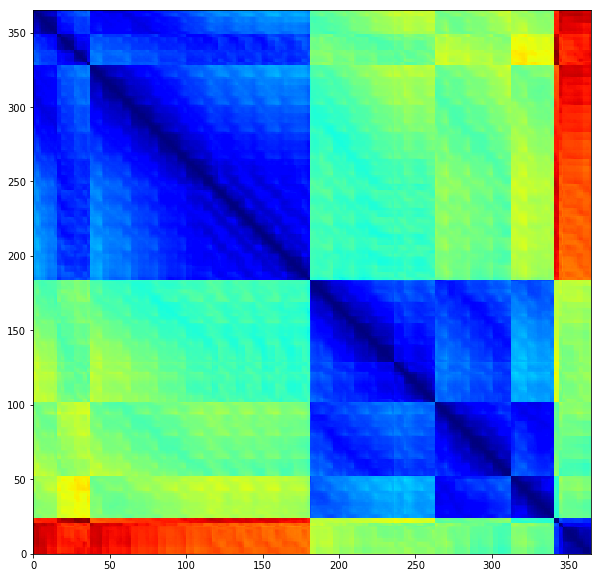

In [824]:
plt.figure(figsize=(10,10))
plt.imshow(dist22, cmap='jet',interpolation='nearest', origin='upper', extent=[0,len(dist22),0,len(dist22)], aspect='auto')